<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;
        color: #cdd6f4;
        border-left: 6px solid #89b4fa;
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        box-sizing: border-box;
        max-width: 100%;
        overflow-wrap: break-word;
    }
    .note-box h2 {
        color: #89b4fa;
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }
    .note-box strong { color: #f9e2af; font-weight: 600; }
    .note-box .code-inline {
        background-color: #313244;
        color: #f38ba8;
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
    }
    .note-box ul { padding-left: 20px; margin: 10px 0; }
    .note-box li { margin-bottom: 8px; }
</style>

<div class="note-box">
    <h2>6. The Outlier Hunter: Isolation Forest</h2>
    <p>
        We have spent 5 notebooks predicting labels (Supervised Learning). But what if we don't have labels? What if we just want to ask: <strong>"Which data points are weird?"</strong>
    </p>
    <p>
        This is <strong>Anomaly Detection</strong>. It is used for credit card fraud, factory defect detection, and network security.
    </p>
    <h3>The Logic: Isolation</h3>
    <p>
        The <strong>Isolation Forest</strong> algorithm is unique. It doesn't try to describe the "normal" data. Instead, it tries to <strong>isolate</strong> every single point.
    </p>
    <ul>
        <li>Imagine slicing a cake with random knife cuts.</li>
        <li><strong>Anomalies:</strong> Are typically far away from the center. It takes very few random cuts to separate (isolate) them.</li>
        <li><strong>Normal Points:</strong> Are clustered deep inside the crowd. You need many, many cuts to isolate a single person in a crowded room.</li>
    </ul>
    <p>
        <strong>The Rule:</strong> Short path length in the tree = Anomaly.
    </p>
</div>

<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;
        color: #cdd6f4;
        border-left: 6px solid #89b4fa;
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        box-sizing: border-box;
        max-width: 100%;
        overflow-wrap: break-word;
    }
    .note-box h2 {
        color: #89b4fa;
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }
    .note-box strong { color: #f9e2af; font-weight: 600; }
    .note-box .code-inline {
        background-color: #313244;
        color: #f38ba8;
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
    }
    .note-box ul { padding-left: 20px; margin: 10px 0; }
    .note-box li { margin-bottom: 8px; }
</style>
<div class="note-box">
    <h2>1. Creating the Dataset</h2>
    <p>
        We will simulate a manufacturing process.
    </p>
    <ul>
        <li><strong>Normal Data:</strong> A tight cluster of 300 "good" parts.</li>
        <li><strong>Anomalies:</strong> 20 "defective" parts scattered randomly around them.</li>
    </ul>
</div>

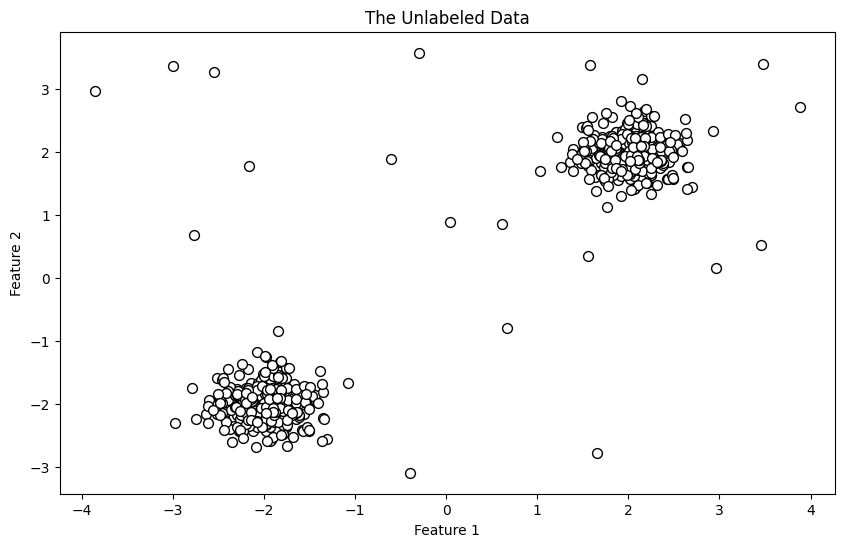

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# 1. Generate "Normal" Data (A dense blob)
rng = np.random.RandomState(42)
X_normal = 0.3 * rng.randn(300, 2)
X_train = np.r_[X_normal + 2, X_normal - 2] # Two blobs

# 2. Generate "Outliers" (Uniform noise scattered everywhere)
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

# Combine them
X = np.r_[X_train, X_outliers]

# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c='white', edgecolor='k', s=50)
plt.title("The Unlabeled Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;
        color: #cdd6f4;
        border-left: 6px solid #89b4fa;
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        box-sizing: border-box;
        max-width: 100%;
        overflow-wrap: break-word;
    }
    .note-box h2 {
        color: #89b4fa;
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }
    .note-box strong { color: #f9e2af; font-weight: 600; }
    .note-box .code-inline {
        background-color: #313244;
        color: #f38ba8;
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
    }
    .note-box ul { padding-left: 20px; margin: 10px 0; }
    .note-box li { margin-bottom: 8px; }
</style>
<div class="note-box">
    <h2>2. Training the Hunter</h2>
    <p>
        We will train the <span class="code-inline">IsolationForest</span>.
    </p>
    <p>
        <strong>Key Parameter:</strong> <span class="code-inline">contamination</span>.
        <br>This is our "guess" of how much of the dataset is anomalous. If we expect 5% fraud, we set this to 0.05.
    </p>
</div>

In [2]:
# Initialize the model
# contamination='auto' or a float (e.g., 0.05)
clf = IsolationForest(contamination=0.05, random_state=42)

# Train (Notice we don't provide 'y' labels! This is unsupervised)
clf.fit(X)

# Predict
# Returns 1 for Normal, -1 for Anomaly
y_pred = clf.predict(X)

# Separate the results for plotting
X_inliers = X[y_pred == 1]
X_anomalies = X[y_pred == -1]

print(f"Normal points detected: {len(X_inliers)}")
print(f"Anomalies detected: {len(X_anomalies)}")

Normal points detected: 589
Anomalies detected: 31


<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;
        color: #cdd6f4;
        border-left: 6px solid #89b4fa;
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        box-sizing: border-box;
        max-width: 100%;
        overflow-wrap: break-word;
    }
    .note-box h2 {
        color: #89b4fa;
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }
    .note-box strong { color: #f9e2af; font-weight: 600; }
    .note-box .code-inline {
        background-color: #313244;
        color: #f38ba8;
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
    }
    .note-box ul { padding-left: 20px; margin: 10px 0; }
    .note-box li { margin-bottom: 8px; }
</style>
<div class="note-box">
    <h2>3. Visualizing the Decision Boundary</h2>
    <p>
        The plot below shows what the Forest "learned".
    </p>
    <ul>
        <li><strong>Red Regions:</strong> High Anomaly Score (Few cuts to reach).</li>
        <li><strong>Blue Regions:</strong> Low Anomaly Score (Deep in the crowd).</li>
        <li><strong>Red Dots:</strong> The points the model flagged as outliers.</li>
    </ul>
    <p>
        Notice how it effectively drew a circle around our normal blobs without us ever telling it where the blobs were!
    </p>
</div>

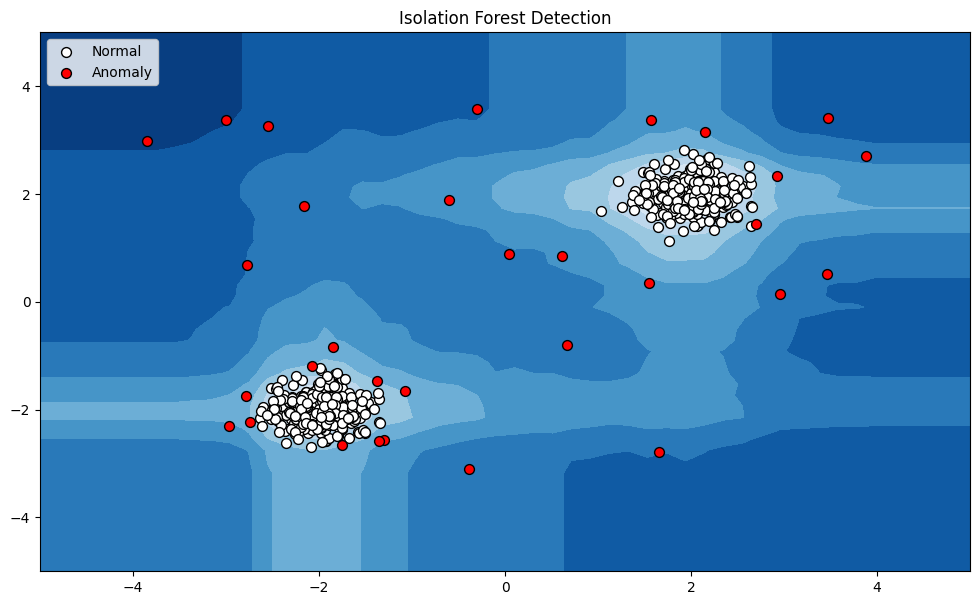

In [3]:
plt.figure(figsize=(12, 7))

# 1. Create a meshgrid to plot the contour
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 2. Plot contours (The "Altitude" of normality)
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

# 3. Plot the data points
b1 = plt.scatter(X_inliers[:, 0], X_inliers[:, 1], c='white', s=50, edgecolor='k')
b2 = plt.scatter(X_anomalies[:, 0], X_anomalies[:, 1], c='red', s=50, edgecolor='k')

plt.title("Isolation Forest Detection")
plt.axis('tight')
plt.legend([b1, b2], ["Normal", "Anomaly"], loc="upper left")
plt.show()

<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;
        color: #cdd6f4;
        border-left: 6px solid #89b4fa;
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        box-sizing: border-box;
        max-width: 100%;
        overflow-wrap: break-word;
    }
    .note-box h2 {
        color: #89b4fa;
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }
    .note-box strong { color: #f9e2af; font-weight: 600; }
    .note-box .code-inline {
        background-color: #313244;
        color: #f38ba8;
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
    }
    .note-box ul { padding-left: 20px; margin: 10px 0; }
    .note-box li { margin-bottom: 8px; }
</style>

<div class="note-box">
    <h2>4. Conclusion: Interpreting the "Map"</h2>
    <p>
        The visualization above perfectly demonstrates the power of the Isolation Forest. Let's break down what we are seeing:
    </p>

<h3>1. The "Normal" Zones (White/Light Blue)</h3>
    <p>
        Notice the two dense clusters of white dots. The background behind them is very <strong>light blue</strong>.
    </p>
    <ul>
        <li>This represents a <strong>Low Anomaly Score</strong>.</li>
        <li>Because these points are huddled together, it takes many, many random cuts to separate one point from the rest. The algorithm says: <em>"These points are hard to isolate, so they must be normal."</em></li>
    </ul>

<h3>2. The "Danger" Zones (Red/Dark Blue)</h3>
    <p>
        Now look at the red dots scattered on the edges. They sit in the <strong>dark blue</strong> regions.
    </p>
    <ul>
        <li>This represents a <strong>High Anomaly Score</strong>.</li>
        <li>These points are alone in empty space. A single random cut can easily separate them from the group. The algorithm says: <em>"These points were isolated instantly, they must be anomalies."</em></li>
    </ul>

<h3>The Magic of "Unsupervised" Learning</h3>
    <p>
        Remember: We <strong>never</strong> told the model which points were bad. It figured this out purely based on the geometry of the data. 
    </p>
    <p>
        This makes Isolation Forest incredibly useful for:
    </p>
    <ul>
        <li><strong>Network Security:</strong> Detecting hacker attacks (which look different from normal traffic).</li>
        <li><strong>Finance:</strong> Flagging credit card transactions that don't fit your spending habits.</li>
        <li><strong>Manufacturing:</strong> Spotting a machine part that is vibrating slightly differently than the others.</li>
    </ul>
    
</div>